In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:


# Input features (temperature in Celsius)
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
x = torch.tensor(t_c).view(-1, 1)  # Reshape to a 2D tensor with 11 rows and 1 column

# Target values (temperature in Fahrenheit)
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = torch.tensor(t_u).view(-1, 1)  # Reshape to a 2D tensor with 11 rows and 1 column


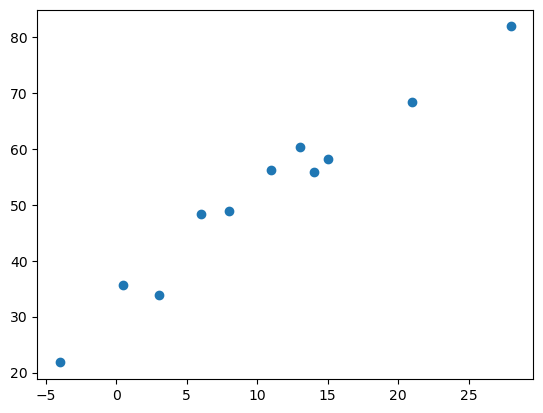

In [3]:
plt.scatter(t_c, t_u);

In [4]:

# Data normalization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_normalized = scaler_x.fit_transform(x.float())
y_normalized = scaler_y.fit_transform(y.float())

In [5]:

class LinearNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearNet, self).__init__()
        self.lin_coeffs = nn.Linear(input_size, output_size)


    def forward(self, x):
        x = self.lin_coeffs(x)
        return x

    
# Define a simple linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

In [6]:

# Instantiate the linear regression model, loss function, and optimizer
#model = LinearRegression()
model = LinearNet(1,1)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [7]:


# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(torch.tensor(x_normalized, dtype=torch.float32))

    # Compute and print loss
    loss = criterion(y_pred, torch.tensor(y_normalized, dtype=torch.float32))
    if epoch % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')
        print(model.state_dict())

    # Zero gradients, perform a backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training, print the final model parameters
print(f'Final Model Parameters: {model.state_dict()}')



Epoch 1, Loss: 3.3908982276916504
OrderedDict([('lin_coeffs.weight', tensor([[-0.6394]])), ('lin_coeffs.bias', tensor([0.8531]))])
Epoch 101, Loss: 2.284599781036377
OrderedDict([('lin_coeffs.weight', tensor([[-0.3454]])), ('lin_coeffs.bias', tensor([0.6983]))])
Epoch 201, Loss: 1.5433228015899658
OrderedDict([('lin_coeffs.weight', tensor([[-0.1048]])), ('lin_coeffs.bias', tensor([0.5716]))])
Epoch 301, Loss: 1.0466285943984985
OrderedDict([('lin_coeffs.weight', tensor([[0.0922]])), ('lin_coeffs.bias', tensor([0.4679]))])
Epoch 401, Loss: 0.7138181328773499
OrderedDict([('lin_coeffs.weight', tensor([[0.2534]])), ('lin_coeffs.bias', tensor([0.3830]))])
Epoch 501, Loss: 0.49081793427467346
OrderedDict([('lin_coeffs.weight', tensor([[0.3854]])), ('lin_coeffs.bias', tensor([0.3135]))])
Epoch 601, Loss: 0.3413962423801422
OrderedDict([('lin_coeffs.weight', tensor([[0.4934]])), ('lin_coeffs.bias', tensor([0.2566]))])
Epoch 701, Loss: 0.24127601087093353
OrderedDict([('lin_coeffs.weight', ten

In [8]:
scaler_x.scale_

array([8.78273099])

### Penguins



In [9]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [10]:
penguins = sns.load_dataset("penguins")

penguins = penguins.dropna()

In [11]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [12]:
penguins.shape

(333, 7)

In [13]:
label_encoder = LabelEncoder()
penguins['species_encoded'] = label_encoder.fit_transform(penguins['species'])

In [14]:
class PenguinDataset(Dataset):
    def __init__(self, data):
        self.X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
        self.y = data['species_encoded'].values
        self.n_samples = len(data)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.int64)

    def __len__(self):
        return self.n_samples

In [15]:

train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=12345)

train_dataset = PenguinDataset(train_data)
test_dataset = PenguinDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [16]:
train_dataset.__getitem__(5)

(tensor([  42.0000,   19.5000,  200.0000, 4050.0000]), tensor(0))

In [17]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [18]:

input_size = 4  # Number of features
hidden_size = 64  # Size of the hidden layer
num_classes = len(label_encoder.classes_) 
learning_rate = 0.001

In [19]:

model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [20]:

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 115.5869
Epoch 2/10, Loss: 26.5169
Epoch 3/10, Loss: 11.0101
Epoch 4/10, Loss: 3.9553
Epoch 5/10, Loss: 1.9202
Epoch 6/10, Loss: 2.8724
Epoch 7/10, Loss: 3.5453
Epoch 8/10, Loss: 1.5377
Epoch 9/10, Loss: 2.0079
Epoch 10/10, Loss: 1.9986


In [21]:

# Evaluation on the test set
model.eval()
correct = 0
total = 0

# might be worth picking this apart line by line...
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Accuracy on test set: 53.73%


Well that was awful. Before we fix it...

In [22]:
num_batches_to_iterate = 3  # Specify the number of batches you want to iterate through


with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        if batch_idx >= num_batches_to_iterate:
            break
        outputs = model(inputs)
        print(inputs)
        print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        print('\n\n\n')

tensor([[  37.7000,   18.7000,  180.0000, 3600.0000],
        [  42.7000,   13.7000,  208.0000, 3950.0000],
        [  39.2000,   21.1000,  196.0000, 4150.0000]])
tensor([[266.2325, 268.1682, 268.5432],
        [292.2104, 294.2860, 296.6678],
        [304.9929, 308.0812, 309.1905]])
tensor([2, 2, 2])




tensor([[  37.7000,   18.7000,  180.0000, 3600.0000],
        [  42.7000,   13.7000,  208.0000, 3950.0000],
        [  39.2000,   21.1000,  196.0000, 4150.0000]])
tensor([[266.2325, 268.1682, 268.5432],
        [292.2104, 294.2860, 296.6678],
        [304.9929, 308.0812, 309.1905]])
tensor([2, 2, 2])




tensor([[  37.7000,   18.7000,  180.0000, 3600.0000],
        [  42.7000,   13.7000,  208.0000, 3950.0000],
        [  39.2000,   21.1000,  196.0000, 4150.0000]])
tensor([[266.2325, 268.1682, 268.5432],
        [292.2104, 294.2860, 296.6678],
        [304.9929, 308.0812, 309.1905]])
tensor([2, 2, 2])






In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaled_features


In [ ]:

train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=12345)

train_dataset = PenguinDataset(train_data)
test_dataset = PenguinDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)


model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


In [ ]:

# Evaluation on the test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

How striking!

### Exercise: the titanic

In [ ]:

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(url)

# Drop rows with missing values for simplicity
titanic_df = titanic_df.dropna()


In [ ]:
titanic_df.head()

#### your exercise:

Create a neural network as above to model survival on the titanic dataset. There are several ways to do this. Here are some suggestions:
* change the size of the output layer (a simple probability, so 1)
* change the output of the final hidden layer to be a probability using nn.Sigmoid()
* change the loss criterion to be nn.BCELoss()

Please note that you can do this all differently: use 2 outputs (one per class), omit sigmoid and keep the same loss function, but the difference might be instructive. 

* also: explore variations of the model architecture (multiple hidden layers? hidden layer size? etc.) and see how far you can push the model performance!

I encourage you to print out lots of intermediate things (your tensors? what is in your data loader? model parameters and performance? etc.)! I learned a lot doing it and I bet you will too.

#### solution: